In [2]:
# Import packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Import dataset
bank = pd.read_csv('bank-additional-full.csv', sep=';')

In [4]:
bank.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [4]:
bank.dtypes

age                 int64
job                object
marital            object
education          object
default            object
housing            object
loan               object
contact            object
month              object
day_of_week        object
duration            int64
campaign            int64
pdays               int64
previous            int64
poutcome           object
emp.var.rate      float64
cons.price.idx    float64
cons.conf.idx     float64
euribor3m         float64
nr.employed       float64
y                  object
dtype: object

In [5]:
bank.duration.mean()

258.2850101971448

In [5]:
# Drop columns we will not be using in our analysis: duration, campaign
bank.drop(columns=["duration","campaign"],inplace=True)

In [6]:
# We will need these column names later
col_names = bank.columns

In [7]:
# Find the dimensions of the data frame
ncol, nrow = bank.shape
print('columns:',ncol,'\nrows:',nrow)

columns: 41188 
rows: 19


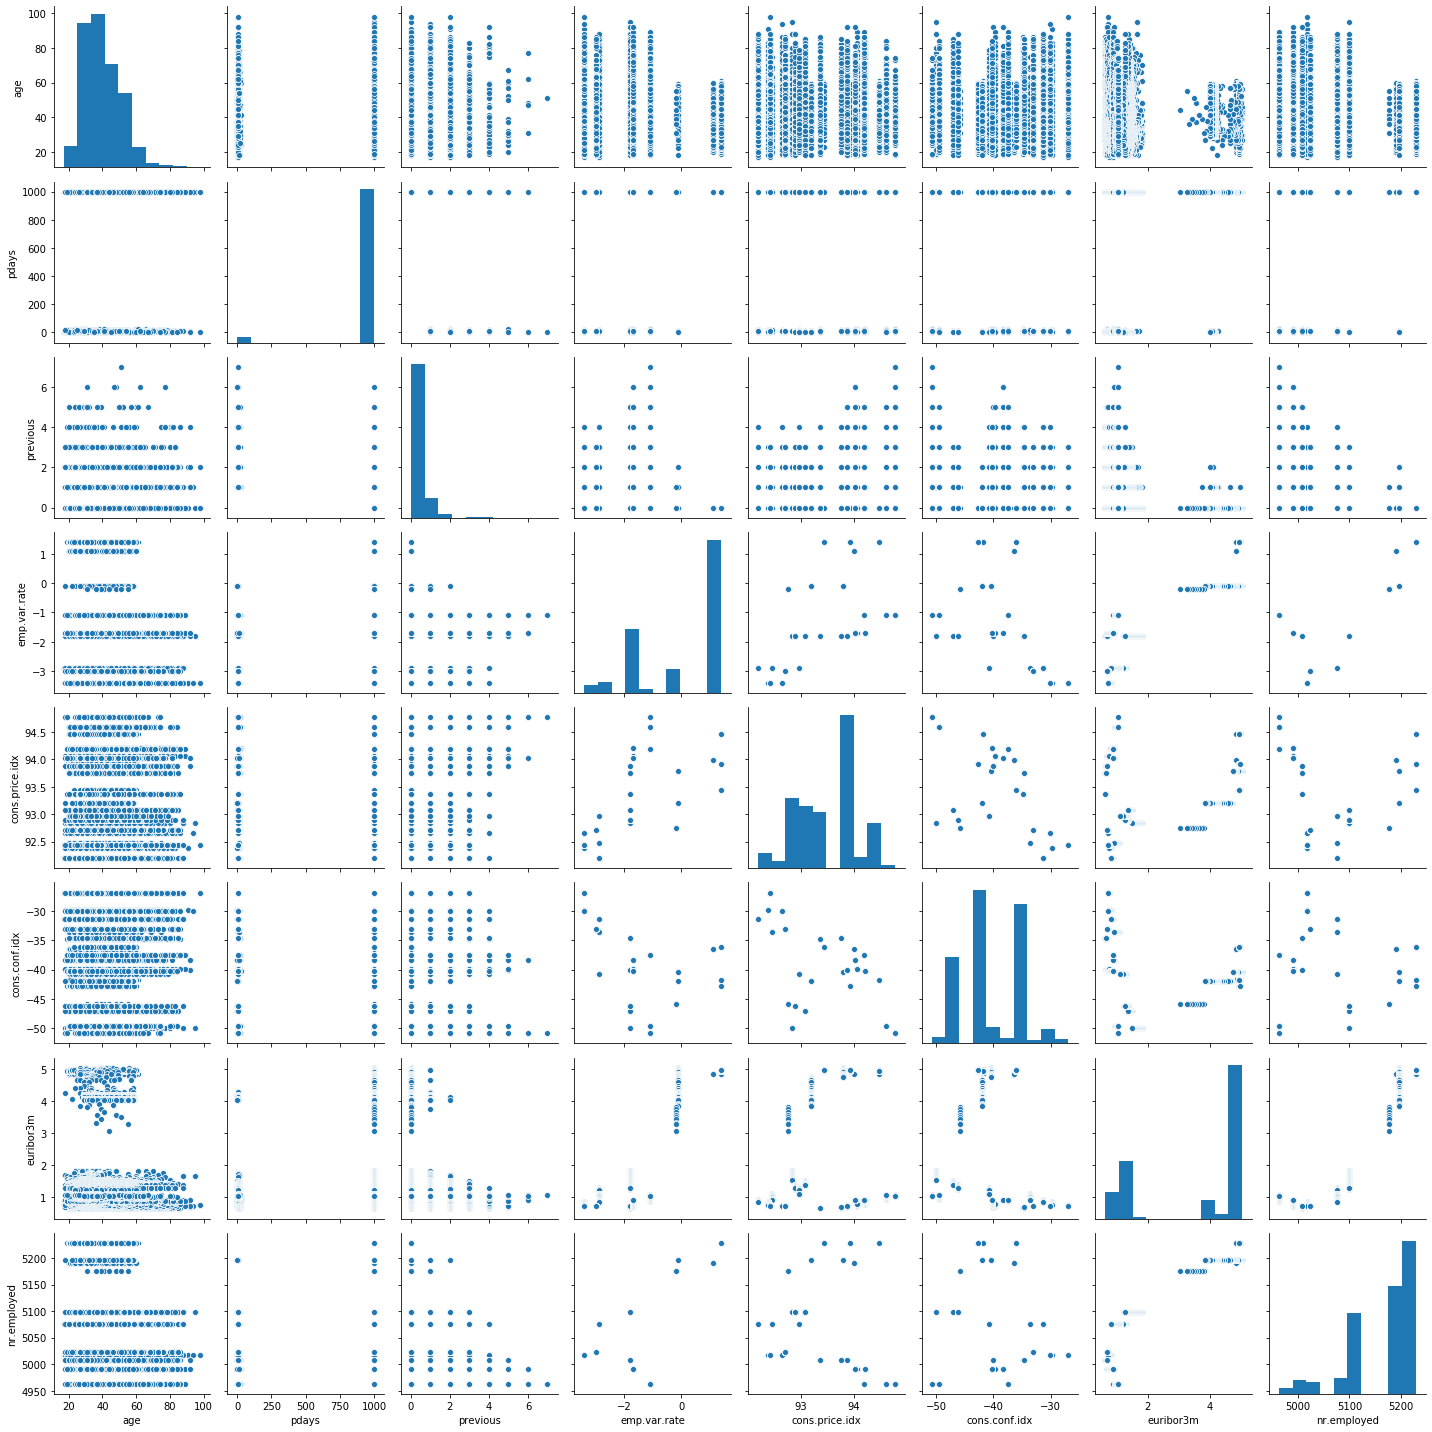

In [91]:
# pairs
cols = ['age', 'default', 'housing', 'loan', 'pdays','previous','emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m','nr.employed', 'y']


sns.pairplot(bank[cols], height=2.5)           
plt.tight_layout()    
plt.show() 

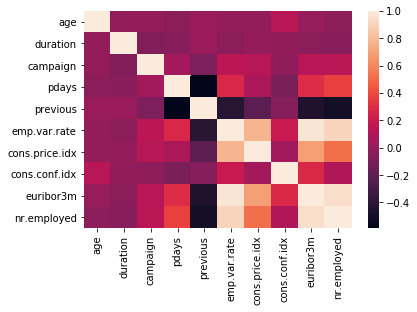

In [92]:
#Heatmap
bank.corr()
sns.heatmap(bank.corr())

In [8]:
# Replace unknown values with NA, then impute
bank.replace("unknown",np.nan, inplace=True)

In [9]:
pd.isnull(bank).sum()

age                  0
job                330
marital             80
education         1731
default           8597
housing            990
loan               990
contact              0
month                0
day_of_week          0
pdays                0
previous             0
poutcome             0
emp.var.rate         0
cons.price.idx       0
cons.conf.idx        0
euribor3m            0
nr.employed          0
y                    0
dtype: int64

In [10]:
# Impute
from sklearn.impute import SimpleImputer
imr = SimpleImputer(strategy='most_frequent')
imr = imr.fit(bank)
bank = imr.transform(bank)
bank = pd.DataFrame(bank)
bank.columns = col_names
bank

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191,no
1,57,services,married,high.school,no,no,no,telephone,may,mon,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes


Categorical variables (non-binary and not ordinal):
- job
- marital
- month
- day of the week

Ordinal:
- education: illiterate < basic.4y < basic.6y < basic.9y < high.school < professional.course < university.degree
(source: https://eacea.ec.europa.eu/national-policies/eurydice/content/portugal_en)
- poutcome

Binary:
- default
- housing
- loan
- contact

In [11]:
# Remap ordinal variables
education_mapping = {"illiterate":0,
                    "basic.4y":1,
                     "basic.6y":2,
                     "basic.9y":3,
                     "high.school":4,
                     "professional.course":5,
                     "university.degree":6}
bank['education'] = bank['education'].map(education_mapping)

poutcome_mapping = {"failure": -1,
                   "nonexistent":0,
                   "success":1}
bank['poutcome'] = bank['poutcome'].map(poutcome_mapping)

In [12]:
# Check the outcome
print('Education unique values:',bank.education.unique())
print('Previous outcome unique values:', bank.poutcome.unique())

Education unique values: [1 4 2 3 5 6 0]
Previous outcome unique values: [ 0 -1  1]


In [13]:
# Remap binary variables to 0, 1
bank['default'] = bank['default'].map({'yes':1, 'no':0})
bank['housing'] = bank['housing'].map({'yes':1, 'no':0})
bank['loan'] = bank['loan'].map({'yes':1, 'no':0})
bank['contact'] = bank['contact'].map({'cellular':1, 'telephone':0})
bank.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,1,0,0,0,0,may,mon,999,0,0,1.1,93.994,-36.4,4.857,5191,no
1,57,services,married,4,0,0,0,0,may,mon,999,0,0,1.1,93.994,-36.4,4.857,5191,no
2,37,services,married,4,0,1,0,0,may,mon,999,0,0,1.1,93.994,-36.4,4.857,5191,no
3,40,admin.,married,2,0,0,0,0,may,mon,999,0,0,1.1,93.994,-36.4,4.857,5191,no
4,56,services,married,4,0,0,1,0,may,mon,999,0,0,1.1,93.994,-36.4,4.857,5191,no


In [14]:
# Create a list of categorical columns
cat_columns = ['job','marital','month','day_of_week']

In [15]:
dummies = pd.get_dummies(bank[cat_columns], drop_first=True)

In [16]:
dummies

,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,...,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed
0,0,0,1,0,0,0,0,0,0,0,...,0,0,1,0,0,0,1,0,0,0
1,0,0,0,0,0,0,1,0,0,0,...,0,0,1,0,0,0,1,0,0,0
2,0,0,0,0,0,0,1,0,0,0,...,0,0,1,0,0,0,1,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,1,0,0,0
4,0,0,0,0,0,0,1,0,0,0,...,0,0,1,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,0,0,0,0,1,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
41184,1,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
41185,0,0,0,0,1,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
41186,0,0,0,0,0,0,0,0,1,0,...,0,0,0,1,0,0,0,0,0,0


In [17]:
bank = bank.join(dummies)

In [18]:
# Now drop original categorical columns
bank.drop(columns=cat_columns, inplace=True)

In [19]:
bank.head()

,age,education,default,housing,loan,contact,pdays,previous,poutcome,emp.var.rate,...,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed
0,56,1,0,0,0,0,999,0,0,1.1,...,0,0,1,0,0,0,1,0,0,0
1,57,4,0,0,0,0,999,0,0,1.1,...,0,0,1,0,0,0,1,0,0,0
2,37,4,0,1,0,0,999,0,0,1.1,...,0,0,1,0,0,0,1,0,0,0
3,40,2,0,0,0,0,999,0,0,1.1,...,0,0,1,0,0,0,1,0,0,0
4,56,4,0,0,1,0,999,0,0,1.1,...,0,0,1,0,0,0,1,0,0,0


In [20]:
bank.columns

Index(['age', 'education', 'default', 'housing', 'loan', 'contact', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'y', 'job_blue-collar',
       'job_entrepreneur', 'job_housemaid', 'job_management', 'job_retired',
       'job_self-employed', 'job_services', 'job_student', 'job_technician',
       'job_unemployed', 'marital_married', 'marital_single', 'month_aug',
       'month_dec', 'month_jul', 'month_jun', 'month_mar', 'month_may',
       'month_nov', 'month_oct', 'month_sep', 'day_of_week_mon',
       'day_of_week_thu', 'day_of_week_tue', 'day_of_week_wed'],
      dtype='object')

Feature Engineering

In [21]:
# Only include 3 columns to summarize job: is_employed, job_student, job_retired, job_unemployed
is_employed = bank['job_blue-collar'] + bank['job_entrepreneur'] + bank['job_housemaid'] + bank['job_management'] + bank['job_self-employed'] + bank['job_services'] + bank['job_technician']


In [22]:
bank['is_employed'] = is_employed

In [23]:
bank.drop(columns=["job_blue-collar","job_entrepreneur",'job_housemaid','job_management','job_self-employed','job_services','job_technician'],inplace=True)

In [24]:
bank.columns

Index(['age', 'education', 'default', 'housing', 'loan', 'contact', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'y', 'job_retired',
       'job_student', 'job_unemployed', 'marital_married', 'marital_single',
       'month_aug', 'month_dec', 'month_jul', 'month_jun', 'month_mar',
       'month_may', 'month_nov', 'month_oct', 'month_sep', 'day_of_week_mon',
       'day_of_week_thu', 'day_of_week_tue', 'day_of_week_wed', 'is_employed'],
      dtype='object')

In [69]:
# Learning curve
np.random.seed(42)
from sklearn.model_selection import learning_curve
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import StratifiedKFold

# Define initial classifiers (not tuned for optimal parameters)
clf_dt_1 = DecisionTreeClassifier()
clf_lr_1 = LogisticRegression()
clf_knn_1 = KNeighborsClassifier()

cv_1 = StratifiedKFold(n_splits=5, shuffle=True)

In [25]:
# Split the data into X and y
X = bank.iloc[:,bank.columns !='y']
y = bank.loc[:,'y']

# create standardized X for k-NN
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
sc.fit(X)
X_std_init = sc.transform(X)

In [26]:
# Replace y with 1 and no with 0
y.replace("yes",1, inplace=True)
y.replace("no",0, inplace=True)

In [27]:
y = y.astype('int')

In [31]:
# Learning curve
np.random.seed(42)
from sklearn.model_selection import learning_curve
from sklearn.model_selection import StratifiedKFold

#Initial decision tree
train_sizes_dt, train_scores_dt, test_scores_dt = learning_curve(
    clf_dt_1, 
    X, 
    y, 
    cv=cv_1, 
    train_sizes = np.linspace(0.1, 1.0 , 10), 
    scoring = "accuracy")
test_scores_mean_dt = np.mean(test_scores_dt, axis=1)
train_scores_mean_dt = np.mean(train_scores_dt, axis=1)

# Initial logistic regression
#To ignore the convergence warnings
from  warnings import simplefilter
from sklearn.exceptions import ConvergenceWarning
simplefilter("ignore", category=ConvergenceWarning)

train_sizes_lr, train_scores_lr, test_scores_lr = learning_curve(
    clf_lr_1, 
    X, 
    y, 
    cv=cv_1, 
    train_sizes = np.linspace(0.1, 1.0 , 10), 
    scoring = "accuracy")
test_scores_mean_lr = np.mean(test_scores_lr, axis=1)
train_scores_mean_lr = np.mean(train_scores_lr, axis=1)

# Initial k-NN
train_sizes_knn, train_scores_knn, test_scores_knn = learning_curve(
    clf_knn_1, 
    X_std_init, 
    y, 
    cv=cv_1, 
    train_sizes = np.linspace(0.1, 1.0 , 10), 
    scoring = "accuracy")
test_scores_mean_knn = np.mean(test_scores_knn, axis=1)
train_scores_mean_knn = np.mean(train_scores_knn, axis=1)

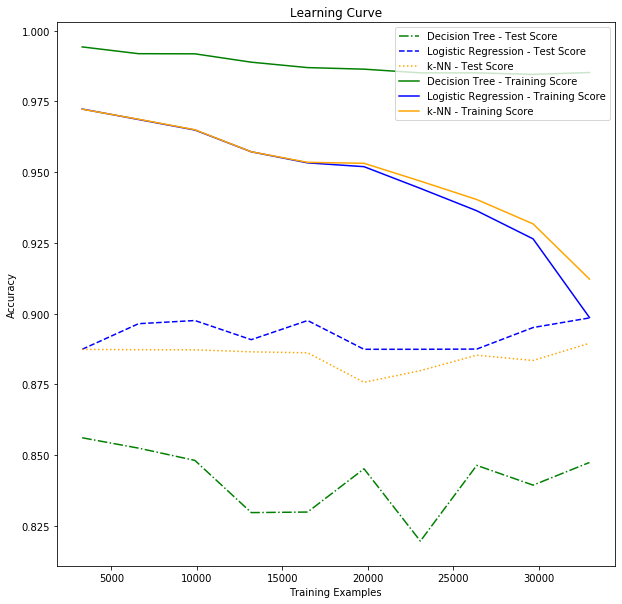

In [32]:
# Plot the test scores
plt.figure(figsize=(10,10))
plt.title('Learning Curve')
plt.xlabel('Training Examples')
plt.ylabel('Accuracy')

plt.plot(train_sizes_dt, test_scores_mean_dt, color='green',
         linestyle='-.',
         label="Decision Tree - Test Score")
plt.plot(train_sizes_lr, test_scores_mean_lr, color='blue',
         linestyle='--', 
         label="Logistic Regression - Test Score")
plt.plot(train_sizes_knn, test_scores_mean_knn, color='orange',
         linestyle=':',
         label="k-NN - Test Score")

# Plot the training scores
plt.plot(train_sizes_dt, train_scores_mean_dt, color='green',
         linestyle='-',
         label="Decision Tree - Training Score")
plt.plot(train_sizes_lr, train_scores_mean_lr, color='blue',
         linestyle='-', 
         label="Logistic Regression - Training Score")
plt.plot(train_sizes_knn, train_scores_mean_knn, color='orange',
         linestyle='-',
         label="k-NN - Training Score")
plt.legend(loc='upper right')

In [28]:
# Due to the results of the learning curve, we want to use only about 25% of the total dataset
np.random.seed(42) 
from sklearn.model_selection import train_test_split
X, X_toss, y, y_toss = train_test_split(
     X, y, test_size=0.75, random_state=42)

Decision Tree Algorithm

In [29]:
np.random.seed(42) 

# Import packages
from sklearn.model_selection import GridSearchCV, StratifiedKFold, cross_val_score

# Set the inner_cv and outer_cv for hyperparameter tuning
inner_cv = StratifiedKFold(n_splits=5, shuffle=True)
outer_cv = StratifiedKFold(n_splits=5, shuffle=True)

In [75]:
np.random.seed(42) 
from sklearn.tree import DecisionTreeClassifier

# Find the optimal tree
gs_dt = GridSearchCV(estimator=DecisionTreeClassifier(random_state=42),
                  param_grid=[{'max_depth': range(1,15),
                              'criterion':['gini','entropy'],
                              'min_samples_leaf':[1,50,100,200],
                              'max_features':['auto','sqrt','log2',None]}],
                  scoring='accuracy',
                  cv=inner_cv)

In [37]:
1-sum(y)/len(y)

0.8876371758764688

In [37]:
np.random.seed(42) 
# Fit grid search to the data
gs_dt.fit(X,y)

# Find the best parameters for the decision tree model and the corresponding performance
print("Decision Tree Paramter Tuning:")
print("Non-nested CV Accuracy: ", gs_dt.best_score_)
print("Optimal Parameter: ", gs_dt.best_params_)    
print("Optimal Estimator: ", gs_dt.best_estimator_)

Decision Tree Paramter Tuning:
Non-nested CV Accuracy:  0.9015245877676504
Optimal Parameter:  {'criterion': 'entropy', 'max_depth': 3, 'max_features': None, 'min_samples_leaf': 1}
Optimal Estimator:  DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=3, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=42, splitter='best')


In [40]:
np.random.seed(42) 
from sklearn.tree import DecisionTreeClassifier
clf_dt = DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=6, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=42, splitter='best')
scores_accuracy = cross_val_score(clf_dt, X=X, y=y, cv=outer_cv)
scores_auc = cross_val_score(clf_dt, X=X, y=y, cv=outer_cv, scoring = 'roc_auc')
scores_auc = cross_val_score(clf_dt, X=X, y=y, cv=outer_cv, scoring = 'roc_auc')
# Accuracy
print("Accuracy: %0.2f (+/- %0.3f)" % (scores_accuracy.mean(), scores_accuracy.std() * 2))
# Precision
print("AUC: %0.2f (+/- %0.3f)" % (scores_auc.mean(), scores_auc.std() * 2))
# F-1
f1_dt = cross_val_score(clf_dt, X=X, y=y, cv=outer_cv, scoring = "f1")
print("F-measure: %0.2f (+/- %0.3f) " % (f1_dt.mean(), f1_dt.std() * 2))

Accuracy: 0.90 (+/- 0.012)
AUC: 0.76 (+/- 0.063)
F-measure: 0.37 (+/- 0.108) 


Confusion matrix, without normalization
[[2696   47]
 [ 273   74]]


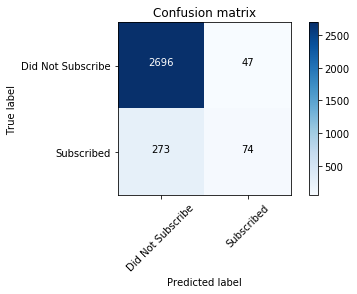

In [41]:
np.random.seed(42) 
# Confusion matrix

# Split into train and test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# Generate predictions
y_pred = clf_dt.fit(X_train, y_train).predict(X_test)

from sklearn.metrics import confusion_matrix
cnf_matrix = confusion_matrix(y_test, y_pred)

# Confusion Matrix function
# Credit to Dr. Vilma Todri
import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    
plot_confusion_matrix(cnf_matrix, classes = ['Did Not Subscribe', 'Subscribed'])

Logistic Regresssion

In [43]:
np.random.seed(42) 
from sklearn import linear_model

#To ignore the convergence warnings
from  warnings import simplefilter
from sklearn.exceptions import ConvergenceWarning
simplefilter("ignore", category=ConvergenceWarning)

# Logistic regression: find the optimal parameters
gs_lr = GridSearchCV(estimator=linear_model.LogisticRegression(random_state=42, solver='saga', n_jobs = 2),
                  param_grid=[{'C': [ 0.001, 0.01, 0.1 ,1 ,10 ,100, 1000, 10000 ],
                              'penalty':['l1','l2'],
                              'class_weight':['balanced', None]}],
                  scoring='accuracy',
                  cv=inner_cv)

In [44]:
np.random.seed(42) 

# Fit grid search to the data
gs_lr = gs_lr.fit(X,y)

# Optimal parameters and corresponding performance:
print("logistic regression Paramter Tuning:")
print("Non-nested CV accuracy: ", gs_lr.best_score_)
print("Optimal Parameter: ", gs_lr.best_params_)    
print("Optimal Estimator: ", gs_lr.best_estimator_)


logistic regression Paramter Tuning:
Non-nested CV accuracy:  0.9001652230086241
Optimal Parameter:  {'C': 0.001, 'class_weight': 'balanced', 'penalty': 'l1'}
Optimal Estimator:  LogisticRegression(C=0.001, class_weight='balanced', dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=100, multi_class='auto', n_jobs=2, penalty='l1',
                   random_state=42, solver='saga', tol=0.0001, verbose=0,
                   warm_start=False)


In [45]:
np.random.seed(42) 
from sklearn import linear_model

clf_lr = linear_model.LogisticRegression(C=0.001, class_weight='balanced', dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=100, multi_class='auto', n_jobs=2, penalty='l1',
                   random_state=42, solver='saga', tol=0.0001, verbose=0,
                   warm_start=False)

accuracy_lr = cross_val_score(clf_lr, X=X, y=y, cv=outer_cv)
print("Accuracy: %0.2f (+/- %0.3f)" % (accuracy_lr.mean(), accuracy_lr.std() * 2))
auc_lr = cross_val_score(clf_lr, X=X, y=y, cv=outer_cv, scoring = "roc_auc")
print("AUC: %0.2f (+/- %0.3f) " % (auc_lr.mean(), auc_lr.std() * 2))

Accuracy: 0.90 (+/- 0.006)
AUC: 0.62 (+/- 0.032) 


In [46]:
# F-1
f1_lr = cross_val_score(clf_lr, X=X, y=y, cv=outer_cv, scoring = "f1")
print("F-measure: %0.2f (+/- %0.3f) " % (f1_lr.mean(), f1_lr.std() * 2))

F-measure: 0.33 (+/- 0.038) 


Confusion matrix, without normalization
[[2698   45]
 [ 272   75]]


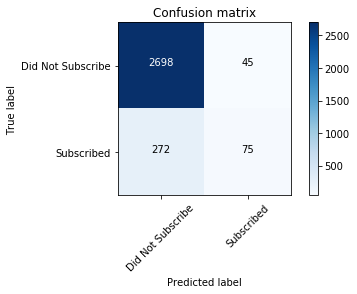

In [64]:
#To ignore the convergence warnings
from  warnings import simplefilter
from sklearn.exceptions import ConvergenceWarning
simplefilter("ignore", category=ConvergenceWarning)


# Confusion matrix
# Generate predictions
y_pred = clf_lr.fit(X_train, y_train).predict(X_test)

from sklearn.metrics import confusion_matrix
cnf_matrix = confusion_matrix(y_test, y_pred)

plot_confusion_matrix(cnf_matrix, classes = ['Did Not Subscribe', 'Subscribed'])

k-Nearest Neighbors

In [34]:
np.random.seed(42)
from sklearn import neighbors

# Begin buliding a k-NN classifier

# Choose optimal k, algorithm, and weights for k-NN model
gs_knn = GridSearchCV(estimator=neighbors.KNeighborsClassifier(p=2, 
                           metric='minkowski'),
                  param_grid=[{'n_neighbors': range(3,21,2),
                              'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
                              'weights': ['uniform', 'distance']}],
                  scoring='accuracy',
                  cv=inner_cv)

In [36]:
# Experimenting with feature selection
np.random.seed(42) 
knn_cols = ['age', 'education', 'default', 'housing', 'loan', 'contact', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'job_retired',
       'job_student', 'job_unemployed', 'marital_married', 'marital_single',
       'month_aug', 'month_dec', 'month_jul', 'month_jun', 'month_mar',
       'month_may', 'month_nov', 'month_oct', 'month_sep', 'day_of_week_mon',
       'day_of_week_thu', 'day_of_week_tue', 'day_of_week_wed', 'is_employed']

# Attribute selection for knn
X_knn = X[knn_cols]

from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
sc.fit(X_knn)
X_std_1 = sc.transform(X_knn)


# Fit grid search to the data
gs_knn.fit(X_std_1,y)
# Find the best parameters for the decision tree model and the corresponding performance
print("k-NN Paramter Tuning:")
print("Non-nested CV accuracy: ", gs_knn.best_score_)
print("Optimal Parameter: ", gs_knn.best_params_)   
# Estimator giving the highest accuracy score
print("Optimal Estimator: ", gs_knn.best_estimator_)

k-NN Paramter Tuning:
Non-nested CV accuracy:  0.8981259636830019
Optimal Parameter:  {'algorithm': 'brute', 'n_neighbors': 19, 'weights': 'uniform'}
Optimal Estimator:  KNeighborsClassifier(algorithm='brute', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=19, p=2,
                     weights='uniform')


In [42]:
# Feature selection train/test split
X_train_knn= X_train[knn_cols]
X_test_knn =  X_test[knn_cols]

X_train_std_knn = sc.transform(X_train_knn)
X_test_std_knn = sc.transform(X_test_knn)

In [38]:
# Performance of the k-NN model with feature selection
clf_knn_test = clf_knn = neighbors.KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=19, p=2,
                     weights='uniform')

accuracy_knn = cross_val_score(clf_knn_test, X=X_std_1, y=y, cv=outer_cv)
print("Accuracy: %0.2f (+/- %0.3f): " % (accuracy_knn.mean(), accuracy_knn.std() * 2))
auc_knn = cross_val_score(clf_knn_test, X=X_std_1, y=y, cv=outer_cv, scoring = "roc_auc")
print("AUC: %0.2f (+/- %0.3f) " % (auc_knn.mean(), auc_knn.std() * 2))
# F-1
f1_knn = cross_val_score(clf_knn_test, X=X_std_1, y=y, cv=outer_cv, scoring = "f1")
print("F-measure: %0.2f (+/- %0.3f) " % (f1_knn.mean(), f1_knn.std() * 2))

Accuracy: 0.90 (+/- 0.007): 
AUC: 0.76 (+/- 0.040) 
F-measure: 0.32 (+/- 0.028) 


In [59]:
# Normalize the data for the k-NN model (w/o feature selection for comparison)
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
sc.fit(X)

X_std = sc.transform(X)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

In [60]:
np.random.seed(42) 

# Fit grid search to the data
gs_knn.fit(X_std,y)

# Find the best parameters for the decision tree model and the corresponding performance
print("k-NN Paramter Tuning:")
print("Non-nested CV accuracy: ", gs_knn.best_score_)
print("Optimal Parameter: ", gs_knn.best_params_)   
# Estimator giving the highest accuracy score
print("Optimal Estimator: ", gs_knn.best_estimator_)

k-NN Paramter Tuning:
Non-nested CV accuracy:  0.8990969317747799
Optimal Parameter:  {'algorithm': 'auto', 'n_neighbors': 19, 'weights': 'uniform'}
Optimal Estimator:  KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=19, p=2,
                     weights='uniform')


In [37]:
from sklearn import neighbors

clf_knn = neighbors.KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=19, p=2,
                     weights='uniform')

In [61]:
# non-feature selection model results
accuracy_knn = cross_val_score(clf_knn, X=X_std, y=y, cv=outer_cv)
print("Accuracy: %0.2f (+/- %0.3f): " % (accuracy_knn.mean(), accuracy_knn.std() * 2))
auc_knn = cross_val_score(clf_knn, X=X_std, y=y, cv=outer_cv, scoring = "roc_auc")
print("AUC: %0.2f (+/- %0.3f) " % (auc_knn.mean(), auc_knn.std() * 2))
# F-1
f1_knn = cross_val_score(clf_knn, X=X_std, y=y, cv=outer_cv, scoring = "f1")
print("F-measure: %0.2f (+/- %0.3f) " % (f1_knn.mean(), f1_knn.std() * 2))

Accuracy: 0.90 (+/- 0.008): 
AUC: 0.77 (+/- 0.042) 
F-measure: 0.34 (+/- 0.058) 


Confusion matrix, without normalization
[[2693   50]
 [ 268   79]]


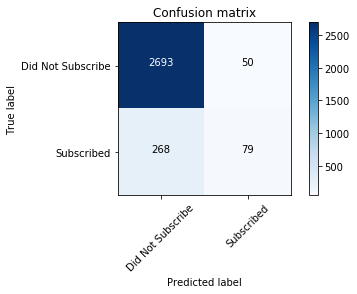

In [62]:
# Confusion matrix
# USING THE MODEL WITH FEATURE SELECTION
# Generate predictions
y_pred = clf_knn.fit(X_train_std_knn, y_train).predict(X_test_std_knn)

from sklearn.metrics import confusion_matrix
cnf_matrix = confusion_matrix(y_test, y_pred)

plot_confusion_matrix(cnf_matrix, classes = ['Did Not Subscribe', 'Subscribed'])

Evaluation
- ROC curve
- Profit curve

In [46]:
# ROC Curve
np.random.seed(42)
# Generate predictions for each model
y_pred_knn_test = clf_knn.fit(X_train_std_knn, y_train).predict_proba(X_test_std_knn)[:,1]
y_pred_lr = clf_lr.fit(X_train, y_train).predict_proba(X_test)[:,1]
y_pred_dt = clf_dt.fit(X_train, y_train).predict_proba(X_test)[:,1]


C:\Users\mboke\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


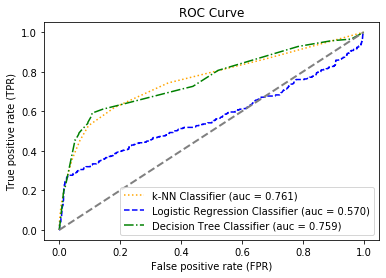

In [52]:
# import roc and auc metrics
from sklearn.metrics import roc_curve
from sklearn.metrics import auc

# Build knn ROC curve (find false positive rates, true positive rates for different thresholds)
fpr_knn, tpr_knn, thresholds_knn = roc_curve(y_true=y_test,
                                             y_score=y_pred_knn_test)
roc_auc_knn = auc(x=fpr_knn, y=tpr_knn)

# logistic regression ROC curve
fpr_lr, tpr_lr, thresholds_lr = roc_curve(y_true=y_test,
                                 y_score=y_pred_lr)
roc_auc_lr = auc(x=fpr_lr, y=tpr_lr)

# decision tree ROC curve
fpr_dt, tpr_dt, thresholds_dt = roc_curve(y_true=y_test,
                                 y_score=y_pred_dt)
roc_auc_dt = auc(x=fpr_dt, y=tpr_dt)

# Plotting the ROC curve
plt.figure()                   
plt.title('ROC Curve')
plt.xlabel('False positive rate (FPR)')
plt.ylabel('True positive rate (TPR)')

# plot the ROC curve: k-NN
plt.plot(fpr_knn, tpr_knn,                         
         color='orange',
         linestyle=':',
         label='%s (auc = %0.3f)' % ('k-NN Classifier', roc_auc_knn))
# ROC curve for logistic regression
plt.plot(fpr_lr, tpr_lr,                         
         color='blue',
         linestyle='--',
         label='%s (auc = %0.3f)' % ('Logistic Regression Classifier', roc_auc_lr))

# ROC curve for decision tree
plt.plot(fpr_dt, tpr_dt,                         
         color='green',
         linestyle='-.',
         label='%s (auc = %0.3f)' % ('Decision Tree Classifier', roc_auc_dt))

# Visualize random classifier
plt.plot([0, 1], [0, 1],
         linestyle='--',
         color='gray',
         linewidth=2)
# placing the legend
plt.legend(loc='best')

Profit Curve

Cost/ Benefit Matrix:

(Actual) Subscribed & (Predicted) Will Subscribe = $20
(Actual) Did Not Subscribe & (Predicted) Will Subscribe= -$15
(Actual) Subscribed & (Predicted) Will Not Subscribe= $0
(Actual) Did Not Subscribe & (Predicted) Will Not Subscribe=$0

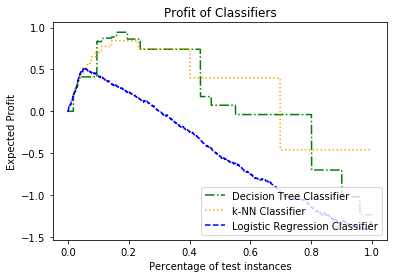

In [80]:
np.random.seed(42)
# Plot a profit curve
# The following code was adapted from: https://carmenlai.com/2016/11/12/user-churn-prediction-a-machine-learning-workflow.html

# define thresholds
thresholds_dt = sorted(y_pred_dt, reverse=True)
thresholds_lr = sorted(y_pred_lr, reverse=True)
thresholds_knn = sorted(y_pred_knn_test, reverse=True)

profits_dt = []
profits_lr = []
profits_knn = []

# define cost/benefit matrix
costbenefit_mat = np.array([[0, -4],
                            [0, 20]])
# Build profit curve for decision tree
for threshold in thresholds_dt:
    thresh_predictions_dt = (y_pred_dt > threshold).astype(int)
    # confusion matrix for each threshold
    confusion_mat_dt = confusion_matrix(y_test, thresh_predictions_dt)
    # Calculate total profit for each threshold
    profit_dt = sum(sum(confusion_mat_dt * costbenefit_mat))/len(y_test)
    profits_dt.append(profit_dt)

plt.figure()    
plt.plot(np.linspace(0, 1, len(y_test)), profits_dt,                         
         color='green',
         linestyle='-.',
        label='Decision Tree Classifier')
    
# knn
for threshold in thresholds_knn:
    thresh_predictions_knn = (y_pred_knn_test > threshold).astype(int)
    # confusion matrix for each threshold
    confusion_mat_knn = confusion_matrix(y_test, thresh_predictions_knn)
    # Calculate total profit for each threshold
    profit_knn = sum(sum(confusion_mat_knn * costbenefit_mat))/len(y_test)
    profits_knn.append(profit_knn)

plt.plot(np.linspace(0, 1, len(y_test)), profits_knn,                         
         color='orange',
         linestyle=':',
        label='k-NN Classifier')
    
#logistic regression
for threshold in thresholds_lr:
    thresh_predictions_lr = (y_pred_lr > threshold).astype(int)
    # confusion matrix for each threshold
    confusion_mat_lr = confusion_matrix(y_test, thresh_predictions_lr)
    # Calculate total profit for each threshold
    profit_lr = sum(sum(confusion_mat_lr * costbenefit_mat))/len(y_test)
    profits_lr.append(profit_lr)

plt.plot(np.linspace(0, 1, len(y_test)), profits_lr,                         
         color='blue',
         linestyle='--',
        label='Logistic Regression Classifier')


plt.xlabel('Percentage of test instances')
plt.ylabel('Expected Profit')
plt.title('Profit of Classifiers')
plt.legend(loc='lower right')

Confusion matrix, without normalization
[[2480  263]
 [ 164  183]]


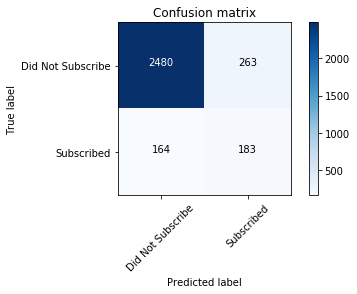

In [81]:
# If we target any customers with probability of responding > 17%:
new_pred = (y_pred_knn_test > 0.17).astype(int)
confusion_mat_knn = confusion_matrix(y_test, new_pred)
plot_confusion_matrix(confusion_mat_knn, classes = ['Did Not Subscribe', 'Subscribed'])

Confusion matrix, without normalization
[[   0 2743]
 [   0  347]]


-34205

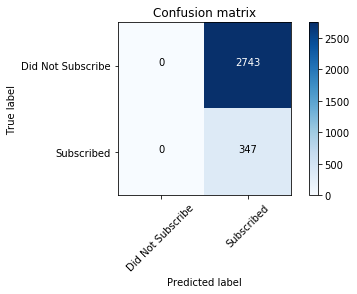

In [75]:
# If we targeted all customers:
new_pred = (y_pred_knn_test >= 0).astype(int)
confusion_mat_knn = confusion_matrix(y_test, new_pred)
plot_confusion_matrix(confusion_mat_knn, classes = ['Did Not Subscribe', 'Subscribed'])
sum(sum(confusion_mat_knn*costbenefit_mat))

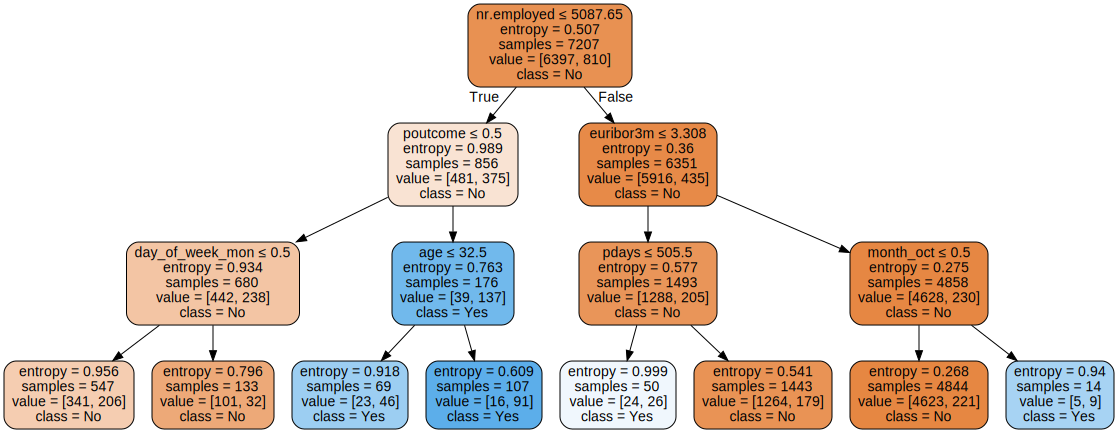

In [73]:
# Visualize the final tree
import graphviz
from sklearn import tree

dot_data = tree.export_graphviz(clf_dt, out_file=None, 
                         feature_names=X.columns,  
                         class_names=['No','Yes'],  
                         filled=True, rounded=True,  
                         special_characters=True)


graph = graphviz.Source(dot_data, format = 'png') 
graph
